# RECODE VARIABLES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
import statsmodels.api as sm
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

### This part has already been implemented in the proper .py files

In [2]:
data = pd.read_csv("TelcoCustomerChurn.csv")

In [3]:
data = pd.get_dummies(data, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn',
                                    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                     'StreamingTV','StreamingMovies'], drop_first = True)

In [4]:
data = data.drop(['MultipleLines_No phone service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service',
                 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service',
                 'StreamingMovies_No internet service'], axis = 1)

In [5]:
data = pd.get_dummies(data, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [6]:
data = data.drop(['InternetService_No', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)'], axis = 1)

In [7]:
data = data.rename(index=str, columns={"SeniorCitizen": "SeniorCitizen_Yes"})

In [8]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [49]:
data.head()

,customerID,SeniorCitizen_Yes,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,1,...,0,0,0,1,0,1,0,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,1,...,0,0,0,0,1,1,0,0,1,0


In [9]:
#data = data.dropna()

In [39]:
n_rows = len(data)
n_rows

7043

# CLUSTER ANALYSIS

In [10]:
data_cluster = data.drop(['customerID', 'SeniorCitizen_Yes', 'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
                          'PhoneService_Yes','DeviceProtection_Yes','TechSupport_Yes','StreamingTV_Yes','StreamingMovies_Yes',
                          'InternetService_DSL','Contract_One year', 'PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check',
                          'OnlineBackup_Yes','OnlineSecurity_Yes','MultipleLines_Yes','Churn_Yes','PaperlessBilling_Yes'], axis = 1)
data_cluster.head()

,tenure,MonthlyCharges,InternetService_Fiber optic,Contract_Month-to-month,PaymentMethod_Electronic check
0,1,29.85,0,1,1
1,34,56.95,0,0,0
2,2,53.85,0,1,0
3,45,42.30,0,0,0
4,2,70.70,1,1,1


In [11]:
def standardize_data(data, standardization):
    result = data.values
    if standardization:
        result = StandardScaler().fit_transform(result)
    return result

In [12]:
data_cluster_s = standardize_data(data_cluster, True)
data_cluster_s

array([[-1.27744458, -1.16032292, -0.88565976,  0.90418382,  1.40641839],
       [ 0.06632742, -0.25962894, -0.88565976, -1.1059698 , -0.71102597],
       [-1.23672422, -0.36266036, -0.88565976,  0.90418382, -0.71102597],
       ...,
       [-0.87024095, -1.1686319 , -0.88565976,  0.90418382,  1.40641839],
       [-1.15528349,  0.32033821,  1.12910177,  0.90418382, -0.71102597],
       [ 1.36937906,  1.35896134,  1.12910177, -1.1059698 , -0.71102597]])

In [13]:
def hierarchical_cluster_analysis():
    clusters = linkage(pdist(data_cluster_s, metric='euclidean'), method='complete')
    labels = ['cluster 1', 'cluster 2', 'coefficients', 'no. of items in clust.']
    clusters_labeled = pd.DataFrame(clusters, columns=labels,
                                    index=['stage %d' % (i + 1) for i in range(clusters.shape[0])]
                                   )
    print(clusters_labeled)
    clusterDendogram = dendrogram(clusters, color_threshold=712, no_labels = True)
    plt.title ("Dendogram")
    plt.xlabel("Cluster Labels excluded for better comprehension")
    plt.ylabel("Dist")
    plt.tight_layout()
    plt.show()

    return None

            cluster 1  cluster 2  coefficients  no. of items in clust.
stage 1           4.0     2407.0      0.000000                     2.0
stage 2          21.0      842.0      0.000000                     2.0
stage 3          22.0     1338.0      0.000000                     2.0
stage 4          33.0      100.0      0.000000                     2.0
stage 5         181.0     2018.0      0.000000                     2.0
stage 6        6064.0     7047.0      0.000000                     3.0
stage 7          45.0     5901.0      0.000000                     2.0
stage 8        2289.0     6242.0      0.000000                     2.0
stage 9          68.0     2091.0      0.000000                     2.0
stage 10       1716.0     3794.0      0.000000                     2.0
stage 11       1424.0     5580.0      0.000000                     2.0
stage 12         88.0     2186.0      0.000000                     2.0
stage 13         91.0      474.0      0.000000                     2.0
stage 

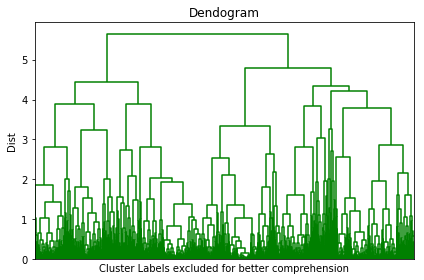

In [14]:
hierarchical_cluster_analysis()

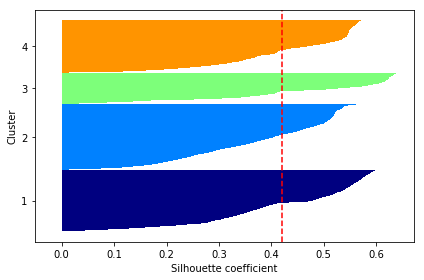

,tenure,MonthlyCharges,InternetService_Fiber optic,Contract_Month-to-month,PaymentMethod_Electronic check,y_km,SeniorCitizen
0,1,29.85,0,1,1,3,0
1,34,56.95,0,0,0,1,0
2,2,53.85,0,1,0,3,0
3,45,42.30,0,0,0,1,0
4,2,70.70,1,1,1,0,0
5,8,99.65,1,1,1,0,0
6,22,89.10,1,1,0,0,0
7,10,29.75,0,1,0,3,0
8,28,104.80,1,1,1,0,0
9,62,56.15,0,0,0,1,0


In [68]:
def k_means_analysis():
    km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    #To me it looks like clusters should be either 3 or 6
    y_km = km.fit_predict(data_cluster_s)
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    
    #Creating the silhouette plot
    silhouette_vals = silhouette_samples(data_cluster_s, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
                 edgecolor='none', color=color)

        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 

    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

    plt.tight_layout()
    plt.show()
    data_cluster['y_km'] = y_km
    return data_cluster

# use of this ->
data_cluster = k_means_analysis()
data_cluster

In [70]:
data_cluster['SeniorCitizen']= data['SeniorCitizen_Yes']
data_cluster.head()

,tenure,MonthlyCharges,InternetService_Fiber optic,Contract_Month-to-month,PaymentMethod_Electronic check,y_km,SeniorCitizen
0,1,29.85,0,1,1,3,0
1,34,56.95,0,0,0,1,0
2,2,53.85,0,1,0,3,0
3,45,42.30,0,0,0,1,0
4,2,70.70,1,1,1,0,0


In [71]:
Cluster_description = data_cluster.groupby('y_km').agg ({'y_km':'count',
                                                         'tenure': 'mean',
                                                         'MonthlyCharges': 'mean',
                                                         'InternetService_Fiber optic':'sum',
                                                         'Contract_Month-to-month':'sum',
                                                         'PaymentMethod_Electronic check':'sum',
                                                         'SeniorCitizen': 'sum'})
Cluster_description['percentage_pop'] = Cluster_description['y_km'] / n_rows
Cluster_description['InternetService_Fiber optic'] = Cluster_description['InternetService_Fiber optic']/sum(Cluster_description['InternetService_Fiber optic'])
Cluster_description['Contract_Month-to-month'] = Cluster_description['Contract_Month-to-month']/sum(Cluster_description['Contract_Month-to-month'])
Cluster_description['PaymentMethod_Electronic check'] = Cluster_description['PaymentMethod_Electronic check']/sum(Cluster_description['PaymentMethod_Electronic check'])
Cluster_description['SeniorCitizen'] = Cluster_description['SeniorCitizen']/sum(Cluster_description['SeniorCitizen'])
Cluster_description.insert(0, 'Cluster_n', ['1', '2', '3', '4'])
Cluster_description = Cluster_description.drop('y_km', axis = 1)
Cluster_description

,Cluster_n,tenure,MonthlyCharges,InternetService_Fiber optic,Contract_Month-to-month,PaymentMethod_Electronic check,SeniorCitizen,percentage_pop
y_km,,,,,,,,
0,1,19.824793,86.631381,0.661176,0.526710,0.556871,0.524518,0.290927
1,2,46.593551,45.894687,0.000000,0.002581,0.092600,0.124343,0.312651
2,3,58.544762,100.991429,0.338824,0.022968,0.118816,0.203152,0.149084
3,4,13.374282,41.049254,0.000000,0.447742,0.231712,0.147986,0.247338
